In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("../datasets/final/TCS.csv")

In [3]:
df.shape

(102, 83)

In [4]:
df.set_index(df.columns[0], inplace=True)

In [5]:
# df = df.T

In [6]:
df

,Mar 4,Jun 4,Sep 4,Dec 4,Mar 5,Jun 5,Sep 5,Dec 5,Mar 6,Jun 6,...,Mar 22,Jun 22,Sep 22,Dec 22,Mar 23,Jun 23,Sep 23,Dec 23,Mar 24,Jun 24
TCS,,,,,,,,,,,,,,,,,,,,,
Close,38.387501,87.250000,128.387497,166.932495,179.007507,169.762497,185.294998,212.857498,239.437500,217.345001,...,3739.949951,3267.100098,3004.550049,3256.699951,3205.899902,3302.25,3528.600098,3793.399902,3876.300049,3904.149902
Equity Share Capital,36.440000,36.440000,36.440000,36.440000,48.010000,48.010000,48.010000,48.010000,48.930000,48.930000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.00,366.000000,366.000000,362.000000,362.000000
Total Share Capital,36.440000,36.440000,36.440000,36.440000,48.010000,48.010000,48.010000,48.010000,48.930000,48.930000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.00,366.000000,366.000000,362.000000,362.000000
Reserves and Surplus,10.640000,10.640000,10.640000,10.640000,3273.040000,3273.040000,3273.040000,3273.040000,5560.400000,5560.400000,...,76807.000000,76807.000000,76807.000000,76807.000000,74172.000000,74172.00,74172.000000,74172.000000,71758.000000,71758.000000
Total Reserves and Surplus,10.640000,10.640000,10.640000,10.640000,3273.040000,3273.040000,3273.040000,3273.040000,5560.400000,5560.400000,...,76807.000000,76807.000000,76807.000000,76807.000000,74172.000000,74172.00,74172.000000,74172.000000,71758.000000,71758.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P/L Before Tax,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,7396.501515,...,12626.000000,11400.000000,13303.000000,13942.000000,13045.000000,13932.00,14444.000000,14046.000000,15180.000000,15878.000000
Tax,66.830000,66.830000,76.980000,82.780000,53.910000,93.430000,90.540000,88.340000,50.050000,79.410000,...,2831.000000,2812.000000,3244.000000,3283.000000,3245.000000,3448.00,3515.000000,3293.000000,3787.000000,3763.000000
P/L After Tax from Ordinary Activities,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,5750.158788,...,9795.000000,8588.000000,10059.000000,10659.000000,9800.000000,10484.00,10929.000000,10753.000000,11393.000000,12115.000000


In [7]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [8]:
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 9
X, y = create_sequences(closing_prices_scaled, look_back)

In [9]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 7s 1s/step - loss: 0.0781 - val_loss: 0.5408
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0417 - val_loss: 0.2919
Epoch 3/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0167 - val_loss: 0.1232
Epoch 4/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0112 - val_loss: 0.0396
Epoch 5/50
2/2 [==============================] - 0s 77ms/step - loss: 0.0156 - val_loss: 0.0204
Epoch 6/50
2/2 [==============================] - 0s 83ms/step - loss: 0.0160 - val_loss: 0.0228
Epoch 7/50
2/2 [==============================] - 0s 55ms/step - loss: 0.0106 - val_loss: 0.0354
Epoch 8/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0060 - val_loss: 0.0550
Epoch 9/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0054 - val_loss: 0.0703
Epoch 10/50
2/2 [==============================] - 0s 57ms/step - loss: 0.0052 - val_loss: 0.0734
Epoch 11/50
2/2 [==============

In [13]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 40ms/step


In [14]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [15]:
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [16]:
full_closing_prices = scaler.inverse_transform(closing_prices_scaled)
all_predictions = np.concatenate([train_predictions, test_predictions], axis=0)

In [17]:
future_predictions = []
last_sequence = closing_prices_scaled[-look_back:]

In [18]:
num_future_predictions = 4
for _ in range(num_future_predictions):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(look_back, 1)

1/1 [==============================] - 0s 30ms/step


In [19]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [20]:
extended_predictions = np.concatenate([all_predictions, future_predictions])

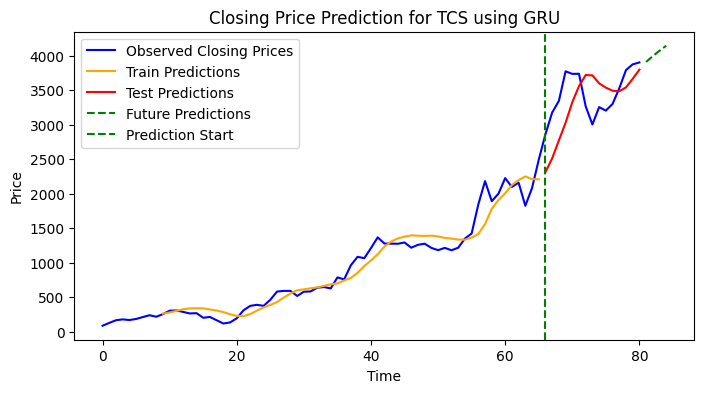

In [21]:
plt.figure(figsize=(8,4))
plt.plot(full_closing_prices, color='blue', label='Observed Closing Prices')
plt.plot(np.arange(look_back, look_back + len(train_predictions)), train_predictions, color='orange', label='Train Predictions')
plt.plot(np.arange(look_back + len(train_predictions), look_back + len(train_predictions) + len(test_predictions)), test_predictions, color='red', label='Test Predictions')
plt.plot(np.arange(len(full_closing_prices), len(full_closing_prices) + num_future_predictions), future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.axvline(x=len(full_closing_prices) - len(test_predictions), color='green', linestyle='--', label='Prediction Start')
plt.title('Closing Price Prediction for TCS using GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
mae = mean_absolute_error(y_test_scaled, test_predictions)
mse = mean_squared_error(y_test_scaled, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_scaled - test_predictions) / y_test_scaled)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 384.52744140625
Mean Squared Error (MSE): 195280.25349143345
Root Mean Squared Error (RMSE): 441.9052539758194
Mean Absolute Percentage Error (MAPE): 11.539340988730878%
